# Train/Test Split and Cross Validation in Python

All information below takien from [Train/Test Split and Cross Validation in Python](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) by Adi Bronshtein

## What is Overfitting/Underfitting a Model?
As mentioned, in statistics and machine learning we usually split our data into two subsets: training data and testing data (and sometimes to three: train, validate and test), and fit our model on the train data, in order to make predictions on the test data. When we do that, one of two thing might happen: we overfit our model or we underfit our model. We don’t want any of these things to happen, because they affect the predictability of our model — we might be using a model that has lower accuracy and/or is ungeneralized (meaning you can’t generalize your predictions on other data). Let’s see what under and overfitting actually mean:

### Overfitting
Overfitting means that model we trained has trained “too well” and is now, well, fit too closely to the training dataset. This usually happens when the model is too complex (i.e. too many features/variables compared to the number of observations). This model will be very accurate on the training data but will probably be very not accurate on untrained or new data. It is because this model is not generalized (or not AS generalized), meaning you can generalize the results and can’t make any inferences on other data, which is, ultimately, what you are trying to do. Basically, when this happens, the model learns or describes the “noise” in the training data instead of the actual relationships between variables in the data. This noise, obviously, isn’t part in of any new dataset, and cannot be applied to it.

### Underfitting
In contrast to overfitting, when a model is underfitted, it means that the model does not fit the training data and therefore misses the trends in the data. It also means the model cannot be generalized to new data. As you probably guessed (or figured out!), this is usually the result of a very simple model (not enough predictors/independent variables). It could also happen when, for example, we fit a linear model (like linear regression) to data that is not linear. It almost goes without saying that this model will have poor predictive ability (on training data and can’t be generalized to other data).

![](fitting.png)

An example of overfitting, underfitting and a model that’s “just right!”
It is worth noting the underfitting is not as prevalent as overfitting. Nevertheless, we want to avoid both of those problems in data analysis. You might say we are trying to find the middle ground between under and overfitting our model. As you will see, train/test split and cross validation help to avoid overfitting more than underfitting. Let’s dive into both of them!

## Train/Test Split

As I said before, the data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

![](split.png)

In [64]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [65]:
# Load the Diabetes dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

Now we can use the train_test_split function in order to make the split. The test_size=0.2 inside the function indicates the percentage of the data that should be held over for testing. It’s usually around 80/20 or 70/30.

In [66]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(309, 10) (309,)
(133, 10) (133,)


In [67]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [68]:
predictions[0:5]

array([193.08664546,  94.4826823 , 257.21439992,  99.52120589,
        76.56136034])

Text(0, 0.5, 'Predictions')

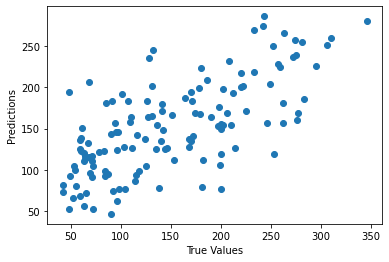

In [69]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [70]:
print("Score:", model.score(X_test, y_test))

Score: 0.47269102620452996


There you go! Here is a summary of what I did: I’ve loaded in the data, split it into a training and testing sets, fitted a regression model to the training data, made predictions based on this data and tested the predictions on the test data. Seems good, right? But train/test split does have its dangers — what if the split we make isn’t random? What if one subset of our data has only people from a certain state, employees with a certain income level but not other income levels, only women or only people at a certain age? (imagine a file ordered by one of these). This will result in overfitting, even though we’re trying to avoid it! This is where cross validation comes in.

## Cross Validation
In the previous paragraph, I mentioned the caveats in the train/test split method. In order to avoid this, we can perform something called [cross validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)). It’s very similar to train/test split, but it’s applied to more subsets. Meaning, we split our data into k subsets, and train on k-1 one of those subset. What we do is to hold the last subset for test. We’re able to do it for each of the subsets.

![](overview.png)

There are a bunch of cross validation methods, I’ll go over two of them: the first is **K-Folds Cross Validation** and the second is **Leave One Out Cross Validation (LOOCV)**.

### K-Folds Cross Validation
In K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.

![K-Folds](kfold.png)

### Leave One Out Cross Validation (LOOCV)
This is another method for cross validation, Leave One Out Cross Validation (by the way, these methods are not the only two, there are a bunch of other methods for cross validation. Check them out in the Sklearn website). In this type of cross validation, the number of folds (subsets) equals to the number of observations we have in the dataset. We then average ALL of these folds and build our model with the average. We then test the model against the last fold. Because we would get a big number of training sets (equals to the number of samples), this method is very computationally expensive and should be used on small datasets. If the dataset is big, it would most likely be better to use a different method, like kfold.

So, what method should we use? How many folds? Well, the more folds we have, we will be reducing the error due the bias but increasing the error due to variance; the computational price would go up too, obviously — the more folds you have, the longer it would take to compute it and you would need more memory. With a lower number of folds, we’re reducing the error due to variance, but the error due to bias would be bigger. It’s would also computationally cheaper. 

**Therefore, in big datasets, k=3 is usually advised. In smaller datasets, as I’ve mentioned before, it’s best to use LOOCV.**

In [71]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

As you remember, earlier on I’ve created the train/test split for the diabetes dataset and fitted a model. Let’s see what is the score after cross validation:

In [72]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


As you can see, the last fold improved the score of the original model — from 0.485 to 0.569. Not an amazing result, but hey, we’ll take what we can get :)

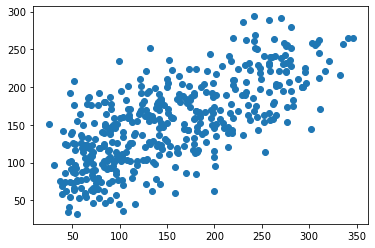

In [73]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)

You can see it’s very different from the original plot from earlier. It is six times as many points as the original plot because I used cv=6.  

Finally, let’s check the R² score of the model (R² is a “number that indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s)”. Basically, how accurate is our model):

In [53]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.4908065838640774
